# Import Libraries and Data

In [1]:
import gc
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow    # parquet engine library

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

from lightgbm import LGBMClassifier, early_stopping
import lightgbm as lgb

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


sns.set_palette("Set2")

%pylab inline
%matplotlib inline

pd.set_option('expand_frame_repr', False)  
pd.set_option('display.max_rows', None) 

Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
processed_train_path = '/content/drive/MyDrive/Amex_Default_Prediction_Kaggle_Competition/processed_sp_train.parquet'
data_train = pd.read_parquet(processed_train_path)


In [ ]:
processed_test_path = '/content/drive/MyDrive/Amex_Default_Prediction_Kaggle_Competition/processed_sp_test.parquet'
data_test = pd.read_parquet(processed_test_path)

# Data review

In [ ]:
data_train.shape

In [ ]:
data_train.set_index('customer_ID', inplace = True)
data_train.head(5)

In [ ]:
data_test.shape

In [ ]:
data_test.set_index('customer_ID', inplace = True)
data_test.head(5)

In [ ]:
cat_features =  ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120',  'D_126', 'D_63', 'D_64', 'D_66', 'D_68'] 
cat_features

In [ ]:
for cat_col in cat_features:
  encoder =  LabelEncoder()
  data_train[cat_col] = encoder.fit_transform(data_train[cat_col])
  data_test[cat_col] = encoder.transform(data_test[cat_col])

In [ ]:
data_train['B_3'].head(10)

In [ ]:
data_train['B_30'].head(10)

In [ ]:
data_train.dtypes

In [ ]:
data_train.dtypes

In [ ]:
data_train.head(5)

# RandomForest
handle missing values automatically
and no need to one-hot encode for categorical features


In [ ]:
feature_list = [col for col in data_train.columns if col != 'target']

In [ ]:
len(feature_list)

In [ ]:
train_data_no_t = data_train[feature_list]
'target' in train_data_no_t.columns

In [ ]:
corr_table = train_data_no_t .corr().abs()
corr_table

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
P_2,1.000000,0.328442,0.397724,0.595661,0.553089,0.307271,0.417983,0.493998,0.091307,0.250012,...,0.152103,0.162873,0.153036,0.176169,0.148738,0.179064,0.021192,0.176195,0.008980,0.162689
D_39,0.328442,1.000000,0.244918,0.290347,0.387437,0.103336,0.645365,0.228650,0.037865,0.069721,...,0.017320,0.021940,0.023319,0.044113,0.040186,0.040938,0.001021,0.044068,0.003378,0.033710
B_1,0.397724,0.244918,1.000000,0.627161,0.280121,0.155165,0.273018,0.735584,0.006559,0.071483,...,0.051314,0.060322,0.056622,0.104008,0.061279,0.104863,0.000489,0.103997,0.034230,0.082072
B_2,0.595661,0.290347,0.627161,1.000000,0.369785,0.237089,0.334212,0.720635,0.033645,0.134957,...,0.092468,0.102850,0.095187,0.160013,0.106510,0.156919,0.005174,0.160044,0.035525,0.130268
R_1,0.553089,0.387437,0.280121,0.369785,1.000000,0.213292,0.425730,0.320425,0.060699,0.179253,...,0.080565,0.090682,0.090597,0.090044,0.082560,0.086250,0.002039,0.090055,0.001547,0.079535
S_3,0.307271,0.103336,0.155165,0.237089,0.213292,1.000000,0.113957,0.140219,0.062188,0.133683,...,0.091883,0.095790,0.096716,0.041310,0.057774,0.043050,0.015988,0.041366,0.015754,0.040956
D_41,0.417983,0.645365,0.273018,0.334212,0.425730,0.113957,1.000000,0.303430,0.028899,0.074501,...,0.012441,0.019418,0.021445,0.064659,0.054636,0.062980,0.002705,0.064628,0.007411,0.055850
B_3,0.493998,0.228650,0.735584,0.720635,0.320425,0.140219,0.303430,1.000000,0.012998,0.093655,...,0.052160,0.060577,0.055155,0.146393,0.090604,0.141747,0.000692,0.146414,0.040520,0.117485
D_42,0.091307,0.037865,0.006559,0.033645,0.060699,0.062188,0.028899,0.012998,1.000000,0.059766,...,0.033036,0.031325,0.029765,0.000308,0.020450,0.005792,0.009304,0.000347,0.013252,0.007212
D_43,0.250012,0.069721,0.071483,0.134957,0.179253,0.133683,0.074501,0.093655,0.059766,1.000000,...,0.175412,0.163968,0.151837,0.056710,0.055264,0.057090,0.015376,0.056724,0.006470,0.054309


In [ ]:
corr_table.shape

(180, 180)

In [ ]:
corr_table['B_33']

P_2      0.574941
D_39     0.301357
B_1      0.566951
B_2      0.918299
R_1      0.343145
S_3      0.216644
D_41     0.317171
B_3      0.650914
D_42     0.035795
D_43     0.138058
D_44     0.432645
B_4      0.499375
D_45     0.159977
B_5      0.056339
R_2      0.278251
D_46     0.104044
D_47     0.208045
D_48     0.552228
D_49     0.112234
B_6      0.116446
B_7      0.546273
B_8      0.204988
D_50     0.034661
D_51     0.281758
B_9      0.611998
R_3      0.153204
D_52     0.205805
P_3      0.234273
B_10     0.039173
D_53     0.059369
S_5      0.093137
B_11     0.538940
S_6      0.276202
D_54     0.194249
R_4      0.229685
S_7      0.228295
B_12     0.023151
S_8      0.078652
D_55     0.542559
D_56     0.065778
B_13     0.015975
R_5      0.162255
D_58     0.523903
S_9      0.025000
B_14     0.217564
D_59     0.153440
D_60     0.030996
D_61     0.519346
B_15     0.066880
S_11     0.009983
D_62     0.373079
D_63     0.110399
D_64     0.148767
D_65     0.100008
B_16     0.793162
B_17     0

In [ ]:
sort_corr = corr_table.unstack()
sort_result = sort_corr.sort_values(kind = 'quicksort')
print(sort_result[-280:-180])   

D_55   D_61     0.765589
D_61   D_55     0.765589
B_3    B_20     0.771337
B_20   B_3      0.771337
       B_33     0.771788
B_33   B_20     0.771788
B_22   B_30     0.772767
B_30   B_22     0.772767
D_138  D_136    0.774587
D_136  D_138    0.774587
S_8    S_15     0.776298
S_15   S_8      0.776298
D_44   D_74     0.781089
D_74   D_44     0.781089
R_13   R_5      0.782354
R_5    R_13     0.782354
D_75   D_44     0.784796
D_44   D_75     0.784796
B_16   B_2      0.785097
B_2    B_16     0.785097
B_20   B_2      0.793049
B_2    B_20     0.793049
B_33   B_16     0.793162
B_16   B_33     0.793162
B_18   B_16     0.793566
B_16   B_18     0.793566
B_19   B_3      0.795338
B_3    B_19     0.795338
R_4    R_2      0.799638
R_2    R_4      0.799638
D_62   D_77     0.817601
D_77   D_62     0.817601
D_55   D_48     0.819927
D_48   D_55     0.819927
D_79   D_131    0.826280
D_131  D_79     0.826280
D_104  D_107    0.827881
D_107  D_104    0.827881
D_48   D_61     0.828788
D_61   D_48     0.828788


In [ ]:
df_corr_col = pd.Series(sort_result[-224:-180])
df_corr_col

B_14   B_15     0.900446
B_15   B_14     0.900446
D_136  D_135    0.904396
D_135  D_136    0.904396
B_13   B_12     0.905110
B_12   B_13     0.905110
S_7    S_3      0.907611
S_3    S_7      0.907611
D_137  D_136    0.907735
D_136  D_137    0.907735
D_138  D_135    0.911945
D_135  D_138    0.911945
B_2    B_33     0.918299
B_33   B_2      0.918299
D_138  D_137    0.921217
D_137  D_138    0.921217
D_58   D_74     0.923896
D_74   D_58     0.923896
D_58   D_75     0.927966
D_75   D_58     0.927966
S_22   S_24     0.965451
S_24   S_22     0.965451
D_141  D_143    0.966718
D_143  D_141    0.966718
D_141  D_139    0.967075
D_139  D_141    0.967075
D_103  D_104    0.971077
D_104  D_103    0.971077
D_135  D_137    0.984099
D_137  D_135    0.984099
B_11   B_37     0.988209
B_37   B_11     0.988209
D_74   D_75     0.988525
D_75   D_74     0.988525
B_37   B_1      0.992982
B_1    B_37     0.992982
B_7    B_23     0.994962
B_23   B_7      0.994962
B_1    B_11     0.995629
B_11   B_1      0.995629


In [ ]:
df_corr_col_new = df_corr_col.to_frame().reset_index()
df_corr_col_new

,level_0,level_1,0
0,B_14,B_15,0.900446
1,B_15,B_14,0.900446
2,D_136,D_135,0.904396
3,D_135,D_136,0.904396
4,B_13,B_12,0.905110
5,B_12,B_13,0.905110
6,S_7,S_3,0.907611
7,S_3,S_7,0.907611
8,D_137,D_136,0.907735
9,D_136,D_137,0.907735


In [ ]:
df_corr_col_new.columns

Index(['level_0', 'level_1', 0], dtype='object')

In [ ]:
list1 = list(df_corr_col_new['level_0'].unique())

In [ ]:
list2 = list(df_corr_col_new['level_1'].unique())

In [ ]:
high90_cor_col = list(set(list1 + list2))   # merge list1 and list2 without duplicate

In [ ]:
len(high90_cor_col)

29

In [ ]:
rdm_forest_features = [c for c in data_train.columns if c not in high90_cor_col]
len(rdm_forest_features)

152

In [ ]:
rdm_train = data_train[rdm_forest_features]
rdm_train.head()

,P_2,D_39,R_1,D_41,B_3,D_42,D_43,D_44,B_4,D_45,...,B_41,D_130,D_131,D_133,R_28,D_140,D_142,D_144,D_145,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.934745,0,0.006104,0.0,0.007174,0.152932,0.525600,0,5,0.740102,...,0,0.000000,0.0,0.006210,0,0,0.141214,0.002970,0,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.880519,6,0.006911,0.0,0.005068,0.152932,0.060646,0,1,0.266275,...,0,0.000000,0.0,0.002996,0,0,0.141214,0.003169,0,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.880875,0,0.006450,0.0,0.007196,0.152932,0.060646,0,2,0.251598,...,0,0.000000,0.0,0.009881,0,0,0.141214,0.000834,0,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.621776,0,0.007829,0.0,0.009937,0.152932,0.046104,0,0,0.085103,...,0,0.000000,0.0,0.001789,0,0,0.141214,0.005560,0,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.871900,0,0.001247,0.0,0.005528,0.152932,0.044671,0,21,0.069952,...,0,1.006119,0.0,0.005045,0,0,0.141214,0.006944,0,0


In [ ]:
rdm_features = [c for c in rdm_train.columns if c not in ['customer_ID', 'target']]
rdm_X = rdm_train[rdm_features ]
rdm_y = rdm_train['target' ]

In [ ]:
X_rdm_train, X_rdm_test, y_rdm_train, y_rdm_test = train_test_split(rdm_X, rdm_y, random_state = 42)

In [ ]:
#n_estimators = 40
#max_depth = 30
#min_samples_split = 5
#min_samples_leaf = 1
#bootstrap = True   # 

In [ ]:
n_estimators = [i*100 for i in list(range(2,22, 2))]
n_estimators

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [ ]:
min_samples_leaf = [i for i in list(range(2,11,1))]
min_samples_leaf

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
n_estimators = [i*100 for i in list(range(2,22, 2))]
max_features = ['auto', 'sqrt', 'log2']    # auto: all features, sqrt: square root of total number of features, 0.2: 20% features ---- maximum features on each tree
max_depth = [i for i in list(range(2,130,10))]
min_samples_leaf = [i for i in list(range(2,55,2))]
min_samples_split = [i for i in list(range(2,55,2))]
bootstrap = [True, False]




In [ ]:
random_grid_rdm_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap
               }

In [ ]:
rdm_model = RandomForestClassifier()
rdm_rgrid_model = RandomizedSearchCV(estimator = rdm_model, param_distributions = random_grid_rdm_params,cv = 2, n_iter = 10, n_jobs = -1)

In [ ]:
#rdm_model = RandomForestClassifier(n_estimators= n_estimators, max_depth = max_depth, min_samples_split=min_samples_split, min_samples_leaf= min_samples_leaf, bootstrap = bootstrap)
#print(rdm_model)

In [ ]:
#rdm_model.get_params()

In [ ]:
rdm_rgrid_model.fit(X_rdm_train, y_rdm_train)
rdm_rgrid_model.best_params_
#print('Best score reached: {} with params: {} '.format(rdm_rgrid_model.best_score_, rdm_rgrid_model.best_params_))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'n_estimators': 600,
 'min_samples_split': 20,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 92,
 'bootstrap': False}

In [ ]:
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", rdm_rgrid_model.best_estimator_)
print("\n The best score across ALL searched params:\n", rdm_rgrid_model.best_score_)
print("\n The best parameters across ALL searched params:\n", rdm_rgrid_model.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap=False, max_depth=92, max_features='sqrt',
                       min_samples_leaf=8, min_samples_split=20,
                       n_estimators=600)

 The best score across ALL searched params:
 0.894007275178393

 The best parameters across ALL searched params:
 {'n_estimators': 600, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 92, 'bootstrap': False}


In [ ]:
best_random_rdm_params = rdm_rgrid_model.best_params_

In [ ]:
best_rdm_model = RandomForestClassifier()
best_rdm_model.set_params(**best_random_rdm_params)

RandomForestClassifier(bootstrap=False, max_depth=92, max_features='sqrt',
                       min_samples_leaf=8, min_samples_split=20,
                       n_estimators=600)

In [ ]:
best_rdm_model.fit(X_rdm_train, y_rdm_train)

RandomForestClassifier(bootstrap=False, max_depth=92, max_features='sqrt',
                       min_samples_leaf=8, min_samples_split=20,
                       n_estimators=600)

In [ ]:
def show_summary_report(actual, prediction, probabilities):
    
    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_score(actual, prediction))
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_score(actual, prediction))
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_score(actual, prediction))
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_score(actual, probabilities[:, 1]))
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities[:, 1])
    roc_auc = auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()

In [ ]:
y_rdm_train_pred = best_rdm_model.predict(X_rdm_train)
y_rdm_train_prob = best_rdm_model.predict_proba(X_rdm_train)

Accuracy : 0.9754 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9657 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9387 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9965                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


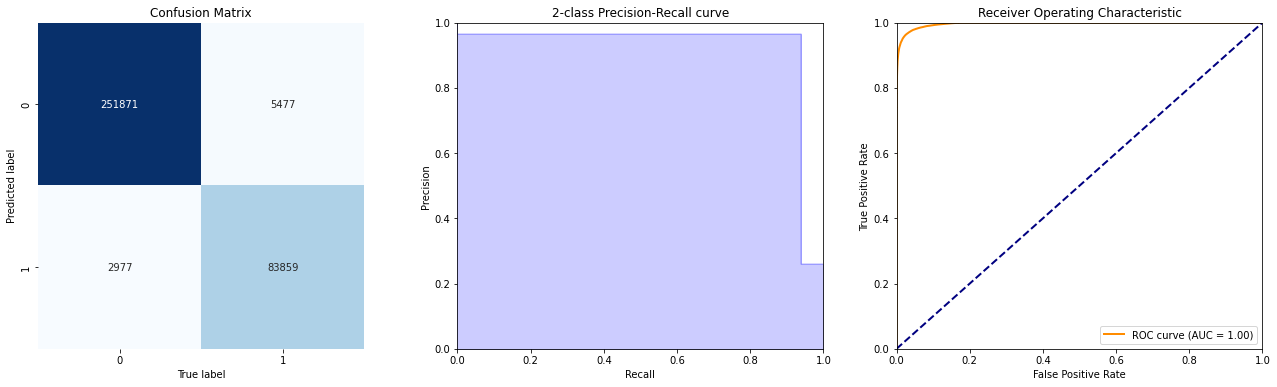

In [ ]:
show_summary_report(y_rdm_train, y_rdm_train_pred, y_rdm_train_prob)

In [ ]:
y_rdm_test_pred = best_rdm_model.predict(X_rdm_test)
y_rdm_test_prod = best_rdm_model.predict_proba(X_rdm_test)

Accuracy : 0.8937 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7977 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7858 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9540                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


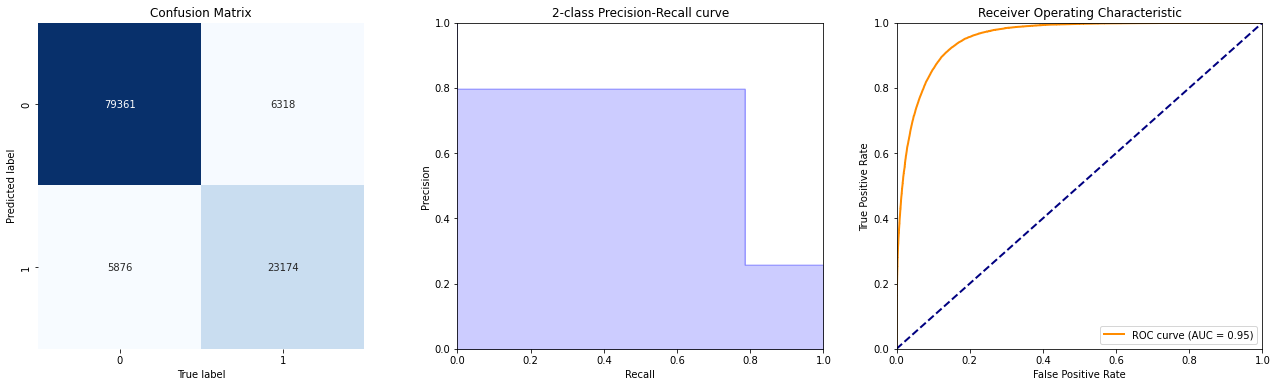

In [ ]:
show_summary_report(y_rdm_test, y_rdm_test_pred, y_rdm_test_prod)

# Prediction submission

In [ ]:
rdm_features = [c for c in rdm_train.columns if c not in ['customer_ID', 'target']]
submission_rdm_test = data_test[rdm_features ]
submission_rdm_test 

In [ ]:
y_rdm_pred_submission = best_rdm_model.predict(submission_rdm_test )

In [ ]:
y_rdm_pred_submission.shape

In [ ]:
y_rdm_pred_submission[:10]

In [ ]:
data_test = data_test.reset_index()

In [ ]:
data_submission =  pd.DataFrame({'customer_ID': data_test.customer_ID, 'prediction':y_rdm_pred_submission })
data_submission.set_index('customer_ID', inplace = True)
data_submission.head(3)

In [ ]:
path = '/content/drive/MyDrive/Amex_Default_Prediction_Kaggle_Competition'
data_submission.to_csv(path+ '/submission_240822_randomforest_only.csv')